# Решение задачи многомерной линейной регрессии с помощью сингулярного разложения

Многомерная линейная регрессия — это классическая тема не только для машинного обучения, но и для прикладной статистики. Мы с вами, однако, не будем вдаваться во многие статистические свойства метода наименьших квадратов, а обсудим вопросы, как строить многомерную линейную регрессию, как проходит процесс обучения, и какие-то чисто конструктивные алгоритмические моменты нас будут интересовать больше.

## Многомерная линейная регрессия

$f_1(x),\ldots,f_n(x)$ - числовые признаки;

Модель многомерной линейной регрессии:

$$f(x,\alpha) = \sum\limits_{j=1}^{n}\alpha_j f_j(x),\ \alpha \in \mathbb{R}^n.$$

Матричные обозначения:

$$ F_{l \times n} = \begin{pmatrix}f_1(x_1) & \ldots & f_n(x_1) \\
\ldots & \ldots & \ldots \\ f_1(x_l) & \ldots & f_n(x_l)\end{pmatrix},\ y_{l \times 1} = \begin{pmatrix}y_1 \\ \ldots \\ y_l\end{pmatrix},\ \alpha_{n \times 1} = \begin{pmatrix}\alpha_1 \\ \ldots \\ \alpha_n\end{pmatrix}.$$

Функционал квадрата ошибки:

$$Q(\alpha, X^l) = \sum\limits_{i=1}^{l}(f(x_i, \alpha) - y_i)^2 = ||F\alpha - y||^2 \rightarrow \min_{\alpha}.$$

- В двумерном случае обученная модель представляет собой гиперплоскость.

 - Это верно, так как данная модель является линейной комбинацией признаков, то есть в двумерном случае модель будет иметь вид $a(x) = w_1\cdot f_1(x) + w_2 \cdot f_2(x)$, где $w_1$ и $w_2$ — найденные параметры модели, а $f_1$ и $f_2$ — признаки (которые в двумерном случае можно считать координатами), $x$ — объект, для которого строится предсказание.
 
- Модель многомерной линейной регрессии решает задачу регрессии.

- Модель многомерной линейной регрессии называется так из-за того, что вычисляет прогноз как линейную комбинацию многих признаков.

## Нормальная система уравнений

Необходимое условие минимума в матричном виде:

$$\frac{\partial Q}{\partial \alpha}(\alpha) = 2F^{\mathrm{T}}(F\alpha - y) = 0,$$

откуда следует _нормальная система_ МНК:

$$F^{\mathrm{T}}F\alpha = F^{\mathrm{T}}y,$$

где $F^{\mathrm{T}}F$ - $n\times n$-матрица.

__Решение системы__: $\alpha^* = (F^{\mathrm{T}}F)^{-1}F^{\mathrm{T}}y= F^+ y.$

Значение функционала: $Q(\alpha^*) = ||P_F y - y||^2$, где $P_F = FF^+ = F(F^{\mathrm{T}}F)^{-1}F^{\mathrm{T}}$ - _проекционная матрица_.

Вопрос лишь в том, как искать эту матрицу $F^+$ и какие могут быть проблемы в процессе ее вычисления. Проблем может быть много, и, в частности, проблема может быть в той же самой мультиколлинеарности, что если столбцы матрицы $F$ линейно-зависимы, то нам вообще не удастся найти обратную матрицу к $F^{\mathrm{T}}F$, она будет вырождена. Если же столбцы этой матрицы $F$ почти линейно-зависимы, то обращаемая матрица будет плохо обусловлена и у нас возникнет масса вычислительных проблем с обращением этой матрицы. 

Как же считать псевдо-обратную и произведение псевдо-обратной на $y$, чтобы найти решение нашей системы? Воспользуемся очень распространенным в настоящее время в вычислительно-линейной алгебре, понятием сингулярного разложения.

## Сингулярное разложение

Произвольная $l\times n$-матрица представима в виде _сингулярного разложения_ (singular value decomposition, SVD):

$$F = VDU^{\mathrm{T}}.$$

__Основные свойства__ сингулярного разложения:

- $l\times n$-матрица $V=(v_1, \ldots, v_n)$ ортогональна, $V^{\mathrm{T}}V = I_n$, столбцы $v_j$ - собственные векторы матрицы $FF^{\mathrm{T}}$.

- $n\times n$-матрица $U=(u_1, \ldots, u_n)$ ортогональна, $U^{\mathrm{T}}U = I_n$, столбцы $u_j$ - собственные векторы матрицы $F^{\mathrm{T}}F$.

- $n\times n$-матрица $D$ диагональна, $D=\mathrm{diag}(\sqrt{\lambda_1},\ldots, \sqrt{\lambda_n})$, $\lambda_j \geq 0$ - собственные значения матриц $F^{\mathrm{T}}F$ и $FF^{\mathrm{T}}$, $\sqrt{\lambda_j}$ - сингулярные числа матрицы $F$.

Это представление очень полезно, так как с его помощью буквально за несколько матричных операций получим другое, гораздо более удобное и понятно интерпретируемое представление для вектора решения задачи наименьших квадратов.

## Решение МНК через сингулярное разложение

Псевдообратная $F^+$, вектор МНК-решения $\alpha^*$, МНК-аппроксимация целевого вектора $F\alpha^*$:

$$F^+ = (UDV^{\mathrm{T}}VDU^{\mathrm{T}})^{-1}UDV^{\mathrm{T}} = UD^{-1}V^{\mathrm{T}} = \sum\limits_{j=1}^{n} \frac{1}{\sqrt{\lambda_j}}u_jv_j^{\mathrm{T}};$$

$$\alpha^* = F^+y = UD^{-1}V^{\mathrm{T}}y = \sum\limits_{j=1}^{n} \frac{1}{\sqrt{\lambda_j}}u_j(v_j^{\mathrm{T}}y);$$

$$F\alpha^* = P_Fy = (VDU^{\mathrm{T}})UD^{-1}V^{\mathrm{T}}y = VV^{\mathrm{T}}y = \sum\limits_{j=1}^{n} v_j(v_j^{\mathrm{T}}y);$$

$$||\alpha^*||^2 = ||D^{-1}V^{\mathrm{T}}y||^2 = \sum\limits_{j=1}^{n} \frac{1}{\lambda_j}(v_j^{\mathrm{T}}y)^2.$$

__Проблема__: мультиколлинеарность при $\lambda_j \rightarrow 0$.

Присмотревшись к этим четырем формулам, мы понимаем, что в трех из них сингулярные числа оказались в знаменателе. Если имеются сингулярные числа, приближающиеся к нулю, то мы получаем ту самую проблему мультиколлинеарности. Близкие к нулю собственные значения или сингулярные числа — это как раз и есть свидетельство того, что среди признаков, среди столбцов матрицы $F$, есть почти линейно-зависимая. И эта проблема приводит к тому, что и псевдо-обратная матрица, и вектор $\alpha$, и его квадрат нормы становятся очень вычислительно неустойчивыми — близкое к нулю число оказывается в знаменателе.

А вот вектор, который аппроксимирует наш целевой вектор $y$ оказывается от сингулярных чисел не зависит. И это означает очень коварный эффект, что нам будет казаться, что этот вектор очень хорошо приближает наш целевой вектор $y$ и, тем не менее, у нас будет проблема мультиколлинеарности и неустойчивости решения в случае, если признаки почти линейно зависимы. Дальше мы с вами будем рассматривать различные способы, каким образом избежать эффекта мультиколлинеарности. 

## Проблема мультиколлинеарности и переобучения

Если имеются сингулярные числа, близкие к нулю, то:

- матрица $\Sigma = F^{\mathrm{T}}F$ плохо обусловлена;

- решение становится неустойчивым и неинтерпетируемым, слишком большие коэффициенты $||\alpha_j^*||$ разных знаков;

- возникает переобучения:
 - на обучении $Q(\alpha^*, X^l) = ||F\alpha^* - y||^2$ мало;
 - на контроле $Q(\alpha^*, X^k) = ||F'\alpha^* - y'||^2$ велико;
 
Стратегии устранения мультиколлинеарности и переобучения:

- отбор признаков: $f_1, \ldots, f_n \rightarrow f_{j_1}, \ldots, f_{j_m}, m \ll n$.

- регуляризация: $||\alpha|| \rightarrow \min$.

- отбор признаков: $f_1, \ldots, f_n \rightarrow g_1, \ldots, g_m, m \ll n$.

## Резюме

- Задача многомерной линейной регрессии может быть решена через сингулярное разложение.

- Мультиколлинеарность приводит к плохой обусловленности, неустойчивости и переобучению.

- Методы устранения мультиколлинеарности (гребневая регрессия, метод главных компонент) также связаны с сингулярным разложением.

# Гребневая регрессия

Гребневая регрессия и лассо — это две техники регуляризации, которые применяются в линейных моделях классификация и регрессия для того, чтобы решить проблемы мультиколлинеарности и переобучения.

## Регуляризация (гребневая регрессия)

Штраф за увеличение нормы вектора весов $||\alpha||$:

$$Q_{\tau}(\alpha) = ||F\alpha - y||^2 + \frac{\tau}{2}||\alpha||^2,$$

где $\tau$ - неотрицательный _параметр регуляризации._

(Дифференцируем по векторному параметру $\alpha$, приравниваем нулю производную и получаем выражение для $\alpha$.)

Модифицированное МНК-решение ($\tau I_n$ - "гребень"):

$$\alpha_{\tau}^{*} = (F^{\mathrm{T}}F + \tau I_n)^{-1}F^{\mathrm{T}}y.$$

__Преимущество__ сингулярного разложения:

- можно подбирать параметр $\tau$, вычислив SVD только один раз.

## Регуляризованный МНК через сингуллярное разложение

Вектор регуляризованного МНК-решения $\alpha_{\tau}^{*}$ и МНК-аппроксимация целевого вектора $F\alpha_{\tau}^{*}$:

$$\alpha_{\tau}^{*} = U(D^2 + \tau I_n)^{-1} DV^{\mathrm{T}}y = \sum\limits_{j=1}^{n}\frac{\sqrt{\lambda_j}}{\lambda_j + \tau}u_j (v_j^{\mathrm{T}}y);$$

$$F\alpha_{\tau}^{*} = VDU^{\mathrm{T}}\alpha_{\tau}^{*} = V\mathrm{diag}\Big(\frac{\lambda_j}{\lambda_j + \tau}\Big)V^{\mathrm{T}}y = \sum\limits_{j=1}^{n}\frac{\lambda_j}{\lambda_j + \tau}v_j (v_j^{\mathrm{T}}y);$$

$$||\alpha_{\tau}^{*}||^2 = ||(D^2 + \tau I_n)^{-1}DV^{\mathrm{T}}y||^2 = \sum\limits_{j=1}^{n}\frac{\lambda_j}{(\lambda_j + \tau)^2}(v_j^{\mathrm{T}}y)^2.$$

$F\alpha_{\tau}^{*} \neq F\alpha^{*}$, но зато решение становится гораздо устойчивее.

## Выбор параметра регуляризации $\tau$

Для подбора $\tau$ можно воспользоваться критерием скользящего контроля или в простейшем случае просто посмотреть на качество восстановления регрессии на контрольной выборке.

Контрольная выборка: $X^k = (x'_i, y'_i)_{i=1}^{k}$;

$$F'_{k\times n} = \begin{pmatrix}f_1(x'_1) & \ldots & f_n(x'_1) \\ \ldots & \ldots & \ldots \\ f_1(x'_k) & \ldots & f_n(x'_k)\end{pmatrix},\ y'_{k\times 1} = \begin{pmatrix}y'_1 \\ \ldots \\ y'_k\end{pmatrix}.$$

Вычисление функционала $Q$ на контрольных данных $T$ раз потребует $O(kn^2 + knT)$ операций:

$$Q(\tau) = ||F'\alpha_{\tau}^{*} - y'||^2 = ||\underbrace{F'U}_{k\times n} \mathrm{diag}(\frac{\sqrt{\lambda_j}}{\lambda_j + \tau})\underbrace{V^{\mathrm{T}}y}_{n \times 1} - y'||^2.$$

Значит, чтобы посчитать значение функционала $Q$, который теперь зависит от константы регуляризации $\tau$, мы должны выписать квадрат нормы разности, подставив вместо $\alpha^*$ полученное нами решение. И тут есть интересный факт, который сильно облегчает вычисления. То что матрица "объекты-признаки" умножается на $U$ — матрицу из собственных векторов. Это умножение можно выполнить $1$ раз, а дальше много раз для разных значений $\tau$ считать это значение функционала $Q(\tau)$.

Зависимость $Q(\tau)$ обычно имеет характерный минимум.

## Регуляризация сокращает "эффективную размерность"

_Сжатие_ (shrinkage) или _сокращение весов_ (weight decay):

$$||\alpha_{\tau}^{*}||^2 = \sum\limits_{j=1}^{n} \frac{\lambda_j}{(\lambda_j + \tau)^2}(v_j^{\mathrm{T}}y)^2\ <\ ||\alpha^{*}||^2 = \sum\limits_{j=1}^{n} \frac{1}{\lambda_j}(v_j^{\mathrm{T}}y)^2.$$

Почему говорят о _сокращении эффективной размерности?_

Роль размерности играет след проекционной матрицы:

$$\mathrm{tr}F(F^{\mathrm{T}}F)^{-1}F^{\mathrm{T}} = \mathrm{tr}(F^{\mathrm{T}}F)^{-1}F^{\mathrm{T}}F = \mathrm{tr} I_n = n.$$

При использовании регуляризации:

$$\mathrm{tr}F(F^{\mathrm{T}}F + \tau I_n)^{-1}F^{\mathrm{T}} = \mathrm{tr}\ \mathrm{diag}\Big(\frac{\lambda_j}{\lambda_j + \tau}\Big) = \sum\limits_{j=1}^{n}\frac{\lambda_j}{\lambda_j + \tau} < n.$$

Что такое гребневая регрессия?

- Это модель многомерной линейной регресии с L2-регуляризатором.

# Метод LASSO

Есть другой подход к регуляризации, когда вместо суммы квадратов коэффициентов мы минимизируем сумму их модулей.

## LASSO приводит к отбору признаков в линейных моделях

LASSO - Least Absolute Shrinkage and Selection Operator, два эквивалентных варианта постановки задачи:

$$Q(\alpha) = ||F\alpha - y||^2 \rightarrow \min_{\alpha} \text{ при } \sum\limits_{j=1}^{n}|\alpha_j| \leq \kappa;$$

$$Q(\alpha) = ||F\alpha - y||^2 + \tau \sum\limits_{j=1}^{n}|\alpha_j| \rightarrow \min_{\alpha}.$$

После замены переменных

$$\begin{cases}\alpha_j = \alpha_j^+ - \alpha_j^-; \\
|\alpha_j| =  \alpha_j^+ + \alpha_j^-\end{cases}\ \alpha_j^+ \geq 0,\ \alpha_j^- \geq 0.$$

ограничения принимают канонический вид:

$$\sum\limits_{j=1}^{n}\alpha_j^+ + \alpha_j^- \leq \kappa;\ \alpha_j^+ \geq 0,\ \alpha_j^- \geq 0.$$

Чем меньше $\kappa$, тем больше $j$ таких, что $\alpha_j^+ = \alpha_j^- = 0.$

Получается так, что некоторые коэффициенты $\alpha_j$ становятся строго равны нулю, а обнуление коэффициента в линейной модели означает, что соответствующий признак больше не используется. То есть, практически мы получаем отбор признаков.

Это происходит из-за того, что задачу с ограничением типа неравенством мы должны решать с помощью теоремы Каруша-Куна-Таккера. А в этой теореме есть требования, чтобы ограничения и минимизируемый функционал были гладкими. А ограничения у нас не гладкие. Ну есть очень простой прием, который позволяет перейти от модулей к гладким ограничениям. Но для этого придется пожертвовать числом переменных и удвоить число переменных в задаче.

Ввести переменные, которые не отрицательны: $\alpha_j^+,\ \alpha_j^-$. Это две переменные, которые появляются вместо каждого вектора, вместо каждого весового коэффициента $\alpha_j$. Ну вот после такой замены получается гладкая задача, к ней действительно может быть применена теорема Каруша-Куна-Таккера, но вот решение этой задачи обладает этим свойством обнуления коэффициентов, и это видно уже сейчас, даже не выписывая все условия теоремы Каруша-Куна-Таккера. 

Действительно, мы получаем ограничения типа неравенств, и если в этих ограничениях параметр κ начинает уменьшаться, то всё чаще и чаще решению становится выгодно, чтобы оба коэффициента, и $\alpha_j^+,\ \alpha_j^-$ оказались строго равны нулю. Ну, а когда они оба вместе оказываются равны нулю, это означает, что весовой коэффициент $\alpha_j$ обнуляется и, в итоге, признак $j$-тый больше не используется в линейной модели. 

## Сравнение гребневой регрессии и Лассо

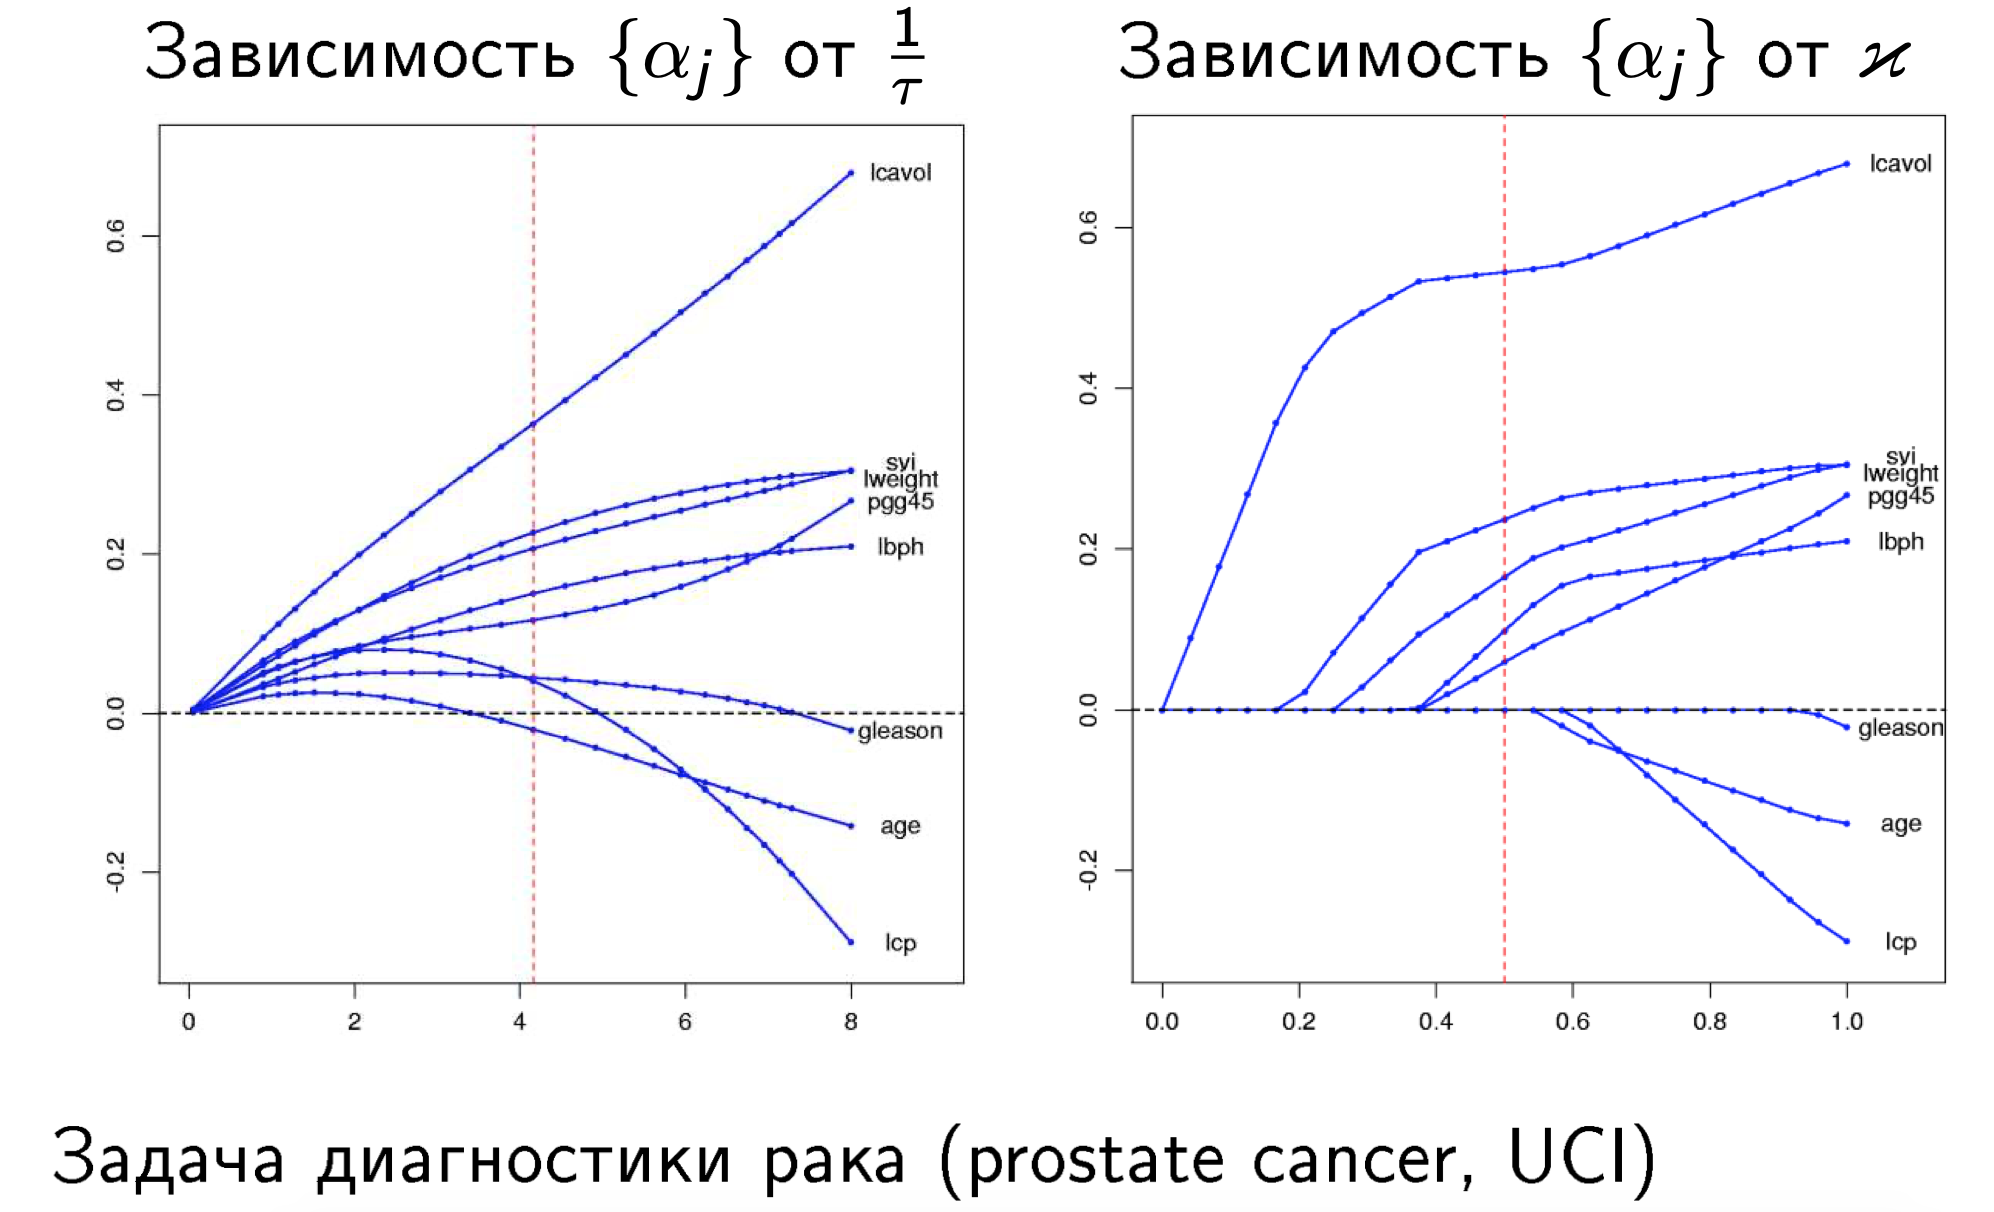

In [1]:
from IPython.display import Image
Image(filename='images/4.1 Линейная регрессия/image_1.png')

Чем отличаются модели гребневой регрессии и LASSO?

- Типом регуляризатора. В гребневой регрессии используется L2-регуяризатор, а в LASSO - L1.

- LASSO умеет обнулять коэффициенты неинформативных признаков. Так как это является следствием L1-регуляризации. В случае гребневой регрессии веса могут становиться очень маленькими, но необязательно нулевыми.

## Резюме

- Гребневая регрессия удобно вводится и интерпретируется через сингулярное разложение.

- Гребневая регрессия сокращает веса признаков.

- LASSO обнуляет веса признаков.

- Оба метода имеют параметр регуляризации (селективности), позволяющий определять число признаков (сложность модели) по внешним критериям (по кросс-валидации).

# Линейная регрессия: прогноз оклада по описанию вакансии

Линейные методы хорошо подходят для работы с разреженными данными — к таковым относятся, например, тексты. Это можно объяснить высокой скоростью обучения и небольшим количеством параметров, благодаря чему удается избежать переобучения.

Линейная регрессия имеет несколько разновидностей в зависимости от того, какой регуляризатор используется. Мы будем работать с гребневой регрессией, где применяется квадратичный, или L2-регуляризатор.

__Реализация в Scikit-Learn__

Для извлечения TF-IDF-признаков из текстов воспользуйтесь классом sklearn.feature_extraction.text.TfidfVectorizer.

Для предсказания целевой переменной мы будем использовать гребневую регрессию, которая реализована в классе sklearn.linear_model.Ridge.

Обратите внимание, что признаки LocationNormalized и ContractTime являются строковыми, и поэтому с ними нельзя работать напрямую. Такие нечисловые признаки с неупорядоченными значениями называют категориальными или номинальными. Типичный подход к их обработке — кодирование категориального признака с m возможными значениями с помощью m бинарных признаков. Каждый бинарный признак соответствует одному из возможных значений категориального признака и является индикатором того, что на данном объекте он принимает данное значение. Данный подход иногда называют one-hot-кодированием. Воспользуйтесь им, чтобы перекодировать признаки LocationNormalized и ContractTime. Он уже реализован в классе sklearn.feature_extraction.DictVectorizer.

### Загрузите данные об описаниях вакансий и соответствующих годовых зарплатах из файла salary-train.csv.

In [12]:
import pandas as pd
from scipy.sparse import hstack
from sklearn.linear_model import Ridge
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
train = pd.read_csv('data/salary-train.csv')
train.head()

,FullDescription,LocationNormalized,ContractTime,SalaryNormalized
0,International Sales Manager London ****k ****...,London,permanent,33000
1,An ideal opportunity for an individual that ha...,London,permanent,50000
2,Online Content and Brand Manager// Luxury Reta...,South East London,permanent,40000
3,A great local marketleader is seeking a perman...,Dereham,permanent,22500
4,Registered Nurse / RGN Nursing Home for Young...,Sutton Coldfield,NaN,20355


### Проведите предобработку

- Приведите тексты к нижнему регистру (text.lower()).

- Замените все, кроме букв и цифр, на пробелы — это облегчит дальнейшее разделение текста на слова. Для такой замены в строке text подходит следующий вызов: re.sub('[^a-zA-Z0-9]', ' ', text). Также можно воспользоваться методом replace у DataFrame, чтобы сразу преобразовать все тексты.

- Примените TfidfVectorizer для преобразования текстов в векторы признаков. Оставьте только те слова, которые встречаются хотя бы в 5 объектах (параметр min_df у TfidfVectorizer).

- Замените пропуски в столбцах LocationNormalized и ContractTime на специальную строку 'nan'.

- Примените DictVectorizer для получения one-hot-кодирования признаков LocationNormalized и ContractTime.

- Объедините все полученные признаки в одну матрицу "объекты-признаки". Обратите внимание, что матрицы для текстов и категориальных признаков являются разреженными. Для объединения их столбцов нужно воспользоваться функцией scipy.sparse.hstack.

In [14]:
def text_transform(text: pd.Series) -> pd.Series:
    return text.str.lower().replace("[^a-zA-Z0-9]", " ", regex=True)

In [17]:
vec = TfidfVectorizer(min_df=5)
X_train_text = vec.fit_transform(text_transform(train['FullDescription']))

In [18]:
train["LocationNormalized"].fillna("nan", inplace=True)
train["ContractTime"].fillna("nan", inplace=True)

In [19]:
enc = DictVectorizer()
X_train_cat = enc.fit_transform(train[["LocationNormalized", "ContractTime"]].to_dict("records"))

In [20]:
X_train = hstack([X_train_text, X_train_cat])

### Обучите гребневую регрессию с параметрами alpha=1 и random_state=241. Целевая переменная записана в столбце SalaryNormalized.

In [21]:
y_train = train["SalaryNormalized"]
model = Ridge(alpha=1, random_state=241)
model.fit(X_train, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=241, solver='auto', tol=0.001)

### Постройте прогнозы для двух примеров из файла salary-test-mini.csv. Значения полученных прогнозов являются ответом на задание. Укажите их через пробел.

In [23]:
test = pd.read_csv("data/salary-test-mini.csv")

X_test_text = vec.transform(text_transform(test["FullDescription"]))
X_test_cat = enc.transform(test[["LocationNormalized", "ContractTime"]].to_dict("records"))
X_test = hstack([X_test_text, X_test_cat])

y_test = model.predict(X_test)

In [33]:
with open('answers/4_1_ans_1.txt', 'w') as f:
    f.write(' '.join(map(str, y_test)))